In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

## Load data

In [ ]:
xls = pd.ExcelFile("https://github.com/OxCGRT/covid-policy-tracker/raw/master/data/timeseries/OxCGRT_timeseries_all.xlsx")

In [3]:
# Load CSV data directly from the URL with pandas, the options are needed to prevent
# reading of records with key "NA" (Namibia) as NaN
data = pd.read_csv(
    "https://storage.googleapis.com/covid19-open-data/v2/oxford-government-response.csv",
    keep_default_na=False,
    na_values=[""],
)

# NOTE: We are only downloading the last day of data, but you can download all
# the data at once if you'd like by changing the URL to:
# https://storage.googleapis.com/covid19-open-data/v2/main.csv

# Print a small snippet of the dataset
print(f"The dataset currently contains {len(data)} records, here is a sample:")

The dataset currently contains 88783 records, here is a sample:


In [5]:
data_health_testing_policy = data[['date','key', 'testing_policy']] 
s1 = (data_health_testing_policy['testing_policy'] - data_health_testing_policy['testing_policy'].min())/(data_health_testing_policy['testing_policy'].max() - data_health_testing_policy['testing_policy'].min())
data_health_testing_policy = data_health_testing_policy.drop(['testing_policy'],axis=1)
data_health_testing_policy.insert(2,'testing_policy',s1)
data_health_testing_policy

,date,key,testing_policy
0,2020-01-01,AD,0.000000
1,2020-01-01,AE,0.000000
2,2020-01-01,AF,0.000000
3,2020-01-01,AL,0.000000
4,2020-01-01,AO,0.000000
...,...,...,...
86977,2020-12-05,NG,0.333333
86978,2020-12-05,NI,0.333333
86979,2020-12-05,US_PA,NaN
86980,2020-12-05,US_WI,NaN


In [4]:
data_health_contact_tracing = data[['date','key', 'contact_tracing']] 
s1 = (data_health_contact_tracing['contact_tracing'] - data_health_contact_tracing['contact_tracing'].min())/(data_health_contact_tracing['contact_tracing'].max() - data_health_contact_tracing['contact_tracing'].min())
data_health_contact_tracing = data_health_contact_tracing.drop(['contact_tracing'],axis=1)
data_health_contact_tracing.insert(2,'contact_tracing',s1)

In [5]:
data_health_emergency_investment_in_healthcare = data[['date','key', 'emergency_investment_in_healthcare']] 
s1 = (data_health_emergency_investment_in_healthcare['emergency_investment_in_healthcare'] - data_health_emergency_investment_in_healthcare['emergency_investment_in_healthcare'].min())/(data_health_emergency_investment_in_healthcare['emergency_investment_in_healthcare'].max() - data_health_emergency_investment_in_healthcare['emergency_investment_in_healthcare'].min())
data_health_emergency_investment_in_healthcare = data_health_emergency_investment_in_healthcare.drop(['emergency_investment_in_healthcare'],axis=1)
data_health_emergency_investment_in_healthcare.insert(2,'emergency_investment_in_healthcare',s1)

In [6]:
data_health_investment_in_vaccines = data[['date','key', 'investment_in_vaccines']] 
s1 = (data_health_investment_in_vaccines['investment_in_vaccines'] - data_health_investment_in_vaccines['investment_in_vaccines'].min())/(data_health_investment_in_vaccines['investment_in_vaccines'].max() - data_health_investment_in_vaccines['investment_in_vaccines'].min())
data_health_investment_in_vaccines = data_health_investment_in_vaccines.drop(['investment_in_vaccines'],axis=1)
data_health_investment_in_vaccines.insert(2,'investment_in_vaccines',s1)

## Preprocess Data

In [9]:
data_health_testing_policy_AU = data_health_testing_policy[data_health_testing_policy['key'] == "AU"]
AU_testing_policy_average = data_health_testing_policy_AU.mean(axis=0)
AU_testing_policy_average = AU_testing_policy_average.mean()
print(AU_testing_policy_average)
data_health_contact_tracing_AU = data_health_contact_tracing[data_health_contact_tracing['key'] == "AU"]
AU_contact_tracing_average = data_health_contact_tracing_AU.mean(axis=0)
AU_contact_tracing_average = AU_contact_tracing_average.mean()
print(AU_contact_tracing_average)
data_health_emergency_investment_in_healthcare_AU = data_health_emergency_investment_in_healthcare[data_health_emergency_investment_in_healthcare['key'] == "AU"]
AU_emergency_investment_in_healthcare_average = data_health_emergency_investment_in_healthcare_AU.mean(axis=0)
AU_emergency_investment_in_healthcare_average = AU_emergency_investment_in_healthcare_average.mean()
print(AU_emergency_investment_in_healthcare_average)
data_health_investment_in_vaccines_AU = data_health_investment_in_vaccines[data_health_investment_in_vaccines['key'] == "AU"]
AU_investment_in_vaccines_average = data_health_investment_in_vaccines_AU.mean(axis=0)
AU_investment_in_vaccines_average = AU_investment_in_vaccines_average.mean()
print(AU_investment_in_vaccines_average)
data_facial_coverings = pd.read_excel(xls, 'h6_facial_coverings')
data_facial_coverings_AU = data_facial_coverings[data_facial_coverings['country_name'] == "Australia"]
data_facial_coverings_AU = data_facial_coverings_AU.drop(['country_code','country_name'],axis=1)
data_facial_coverings_AU_average = data_facial_coverings_AU.mean(axis=1)
data_facial_coverings_AU_average = data_facial_coverings_AU_average/(data_facial_coverings_AU.max(axis=1)-data_facial_coverings_AU.min(axis=1))
data_facial_coverings_AU_average = data_facial_coverings_AU_average.mean()
print(data_facial_coverings_AU_average)

0.7174129353233832
0.9283582089552239
2.2910983079651246e-05
0.0010561259347230281


## Compare the results between different countries(countries classification is from this website: https://www.endcoronavirus.org/countries)

## Green means best performance, yellow means moderate performance and red means worst performance.

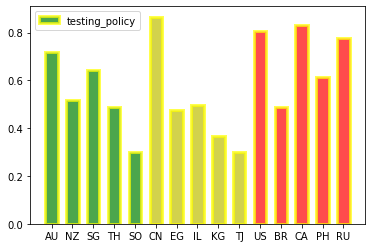

In [29]:
x = ["AU","NZ","SG","TH","SO","CN","EG","IL","KG","TJ","US","BR","CA","PH","RU"]
y = [AU_testing_policy_average ,NZ_testing_policy_average ,SG_testing_policy_average ,TH_testing_policy_average ,SO_testing_policy_average ,
     CN_testing_policy_average ,EG_testing_policy_average ,IL_testing_policy_average ,KG_testing_policy_average ,TJ_testing_policy_average ,
     US_testing_policy_average ,BR_testing_policy_average ,CA_testing_policy_average ,PH_testing_policy_average ,RU_testing_policy_average]
plt.bar(x, y, alpha=0.7, width=0.6, color='gggggyyyyyrrrrr', edgecolor='yellow', label='testing_policy', lw=3)
plt.legend(loc='upper left')
plt.show()

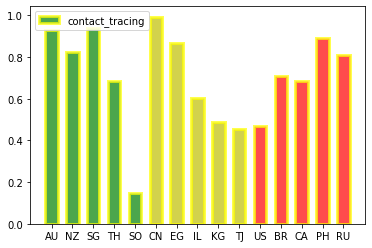

In [30]:
x = ["AU","NZ","SG","TH","SO","CN","EG","IL","KG","TJ","US","BR","CA","PH","RU"]
y = [AU_contact_tracing_average ,NZ_contact_tracing_average ,SG_contact_tracing_average ,TH_contact_tracing_average ,SO_contact_tracing_average ,
     CN_contact_tracing_average ,EG_contact_tracing_average ,IL_contact_tracing_average ,KG_contact_tracing_average ,TJ_contact_tracing_average ,
     US_contact_tracing_average ,BR_contact_tracing_average ,CA_contact_tracing_average ,PH_contact_tracing_average ,RU_contact_tracing_average]
plt.bar(x, y, alpha=0.7, width=0.6, color='gggggyyyyyrrrrr', edgecolor='yellow', label='contact_tracing', lw=3)
plt.legend(loc='upper left')
plt.show()

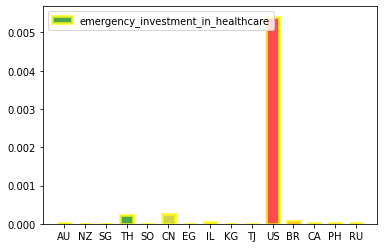

In [31]:
x = ["AU","NZ","SG","TH","SO","CN","EG","IL","KG","TJ","US","BR","CA","PH","RU"]
y = [AU_emergency_investment_in_healthcare_average ,NZ_emergency_investment_in_healthcare_average ,SG_emergency_investment_in_healthcare_average ,TH_emergency_investment_in_healthcare_average ,SO_emergency_investment_in_healthcare_average ,
     CN_emergency_investment_in_healthcare_average ,EG_emergency_investment_in_healthcare_average ,IL_emergency_investment_in_healthcare_average ,KG_emergency_investment_in_healthcare_average ,TJ_emergency_investment_in_healthcare_average ,
     US_emergency_investment_in_healthcare_average ,BR_emergency_investment_in_healthcare_average ,CA_emergency_investment_in_healthcare_average ,PH_emergency_investment_in_healthcare_average ,RU_emergency_investment_in_healthcare_average]
plt.bar(x, y, alpha=0.7, width=0.6, color='gggggyyyyyrrrrr', edgecolor='yellow', label='emergency_investment_in_healthcare', lw=3)
plt.legend(loc='upper left')
plt.show()

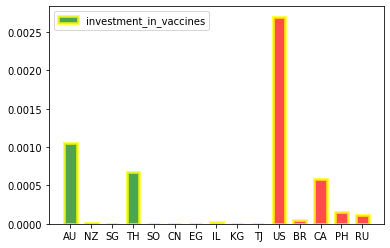

In [32]:
x = ["AU","NZ","SG","TH","SO","CN","EG","IL","KG","TJ","US","BR","CA","PH","RU"]
y = [AU_investment_in_vaccines_average ,NZ_investment_in_vaccines_average ,SG_investment_in_vaccines_average ,TH_investment_in_vaccines_average ,SO_investment_in_vaccines_average ,
     CN_investment_in_vaccines_average ,EG_investment_in_vaccines_average ,IL_investment_in_vaccines_average ,KG_investment_in_vaccines_average ,TJ_investment_in_vaccines_average ,
     US_investment_in_vaccines_average ,BR_investment_in_vaccines_average ,CA_investment_in_vaccines_average ,PH_investment_in_vaccines_average ,RU_investment_in_vaccines_average]
plt.bar(x, y, alpha=0.7, width=0.6, color='gggggyyyyyrrrrr', edgecolor='yellow', label='investment_in_vaccines', lw=3)
plt.legend(loc='upper left')
plt.show()

## Compare the results between different countries(IL,GB,MX,CN,TJ,SG)

## From https://www.kaggle.com/tarunkr/covid-19-case-study-analysis-viz-comparisons, consider 1. Mortality Rate (per 100): Italy: 11.98, United Kingdom: 10.65, Mexico: 10.55, China: 5.24, Tajikistan: 0.78 Singapore: 0.05

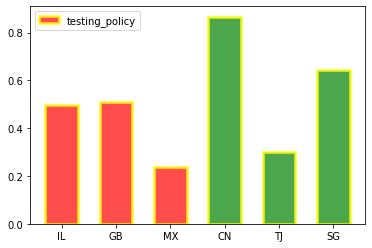

In [33]:
x = ["IL","GB","MX","CN","TJ","SG"]
y = [IL_testing_policy_average ,GB_testing_policy_average ,MX_testing_policy_average ,
     CN_testing_policy_average ,TJ_testing_policy_average ,SG_testing_policy_average]
plt.bar(x, y, alpha=0.7, width=0.6, color='rrrggg', edgecolor='yellow', label='testing_policy', lw=3)
plt.legend(loc='upper left')
plt.show()

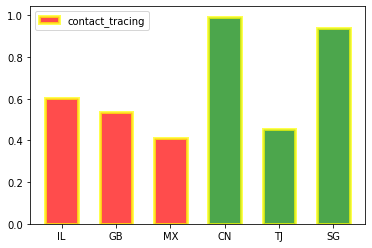

In [34]:
x = ["IL","GB","MX","CN","TJ","SG"]
y = [IL_contact_tracing_average ,GB_contact_tracing_average ,MX_contact_tracing_average ,
     CN_contact_tracing_average ,TJ_contact_tracing_average ,SG_contact_tracing_average]
plt.bar(x, y, alpha=0.7, width=0.6, color='rrrggg', edgecolor='yellow', label='contact_tracing', lw=3)
plt.legend(loc='upper left')
plt.show()

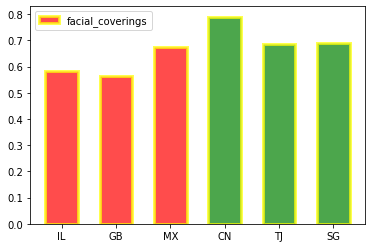

In [49]:
x = ["IL","GB","MX","CN","TJ","SG"]
y = [data_facial_coverings_IL_average ,data_facial_coverings_GB_average ,data_facial_coverings_MX_average ,
     data_facial_coverings_CN_average ,data_facial_coverings_TJ_average ,data_facial_coverings_SG_average]
plt.bar(x, y, alpha=0.7, width=0.6, color='rrrggg', edgecolor='yellow', label='facial_coverings', lw=3)
plt.legend(loc='upper left')
plt.show()

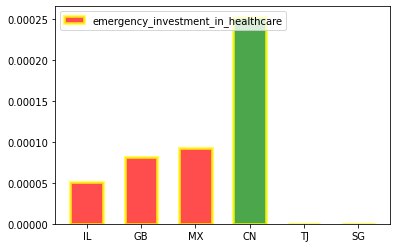

In [36]:
x = ["IL","GB","MX","CN","TJ","SG"]
y = [IL_emergency_investment_in_healthcare_average ,GB_emergency_investment_in_healthcare_average ,MX_emergency_investment_in_healthcare_average ,
     CN_emergency_investment_in_healthcare_average ,TJ_emergency_investment_in_healthcare_average ,SG_emergency_investment_in_healthcare_average]
plt.bar(x, y, alpha=0.7, width=0.6, color='rrrggg', edgecolor='yellow', label='emergency_investment_in_healthcare', lw=3)
plt.legend(loc='upper left')
plt.show()


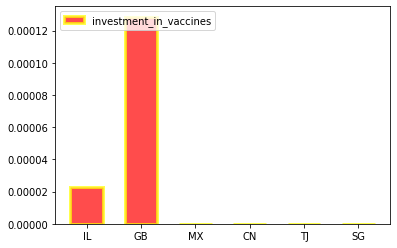

In [37]:
x = ["IL","GB","MX","CN","TJ","SG"]
y = [IL_investment_in_vaccines_average ,GB_investment_in_vaccines_average ,MX_investment_in_vaccines_average ,
     CN_investment_in_vaccines_average ,TJ_investment_in_vaccines_average ,SG_investment_in_vaccines_average]
plt.bar(x, y, alpha=0.7, width=0.6, color='rrrggg', edgecolor='yellow', label='investment_in_vaccines', lw=3)
plt.legend(loc='upper left')
plt.show()


## Compare the results between different countries(BR,KG,CA,EG,KR,CN)

## From https://www.kaggle.com/tarunkr/covid-19-case-study-analysis-viz-comparisons, consider 2. Incident_Rate: Brazil: 2130.34, Kazakhstan: 571.25, Canada: 382.24, Egypt: 99.58, South Korea: 44.81, China: 6.43¶

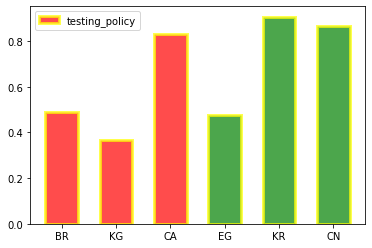

In [38]:
x = ["BR","KG","CA","EG","KR","CN"]
y = [BR_testing_policy_average ,KG_testing_policy_average ,CA_testing_policy_average ,
     EG_testing_policy_average ,KR_testing_policy_average ,CN_testing_policy_average]
plt.bar(x, y, alpha=0.7, width=0.6, color='rrrggg', edgecolor='yellow', label='testing_policy', lw=3)
plt.legend(loc='upper left')
plt.show()

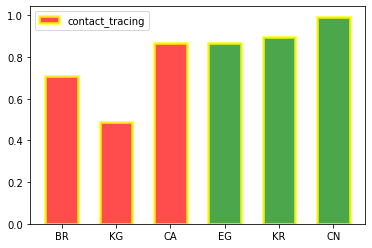

In [39]:
x = ["BR","KG","CA","EG","KR","CN"]
y = [BR_contact_tracing_average ,KG_contact_tracing_average ,EG_contact_tracing_average ,
     EG_contact_tracing_average ,KR_contact_tracing_average ,CN_contact_tracing_average]
plt.bar(x, y, alpha=0.7, width=0.6, color='rrrggg', edgecolor='yellow', label='contact_tracing', lw=3)
plt.legend(loc='upper left')
plt.show()

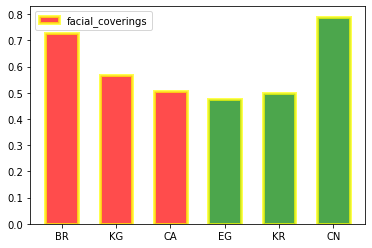

In [48]:
x = ["BR","KG","CA","EG","KR","CN"]
y = [data_facial_coverings_BR_average ,data_facial_coverings_KG_average ,data_facial_coverings_CA_average ,
     data_facial_coverings_EG_average ,data_facial_coverings_KR_average ,data_facial_coverings_CN_average]
plt.bar(x, y, alpha=0.7, width=0.6, color='rrrggg', edgecolor='yellow', label='facial_coverings', lw=3)
plt.legend(loc='upper left')
plt.show()

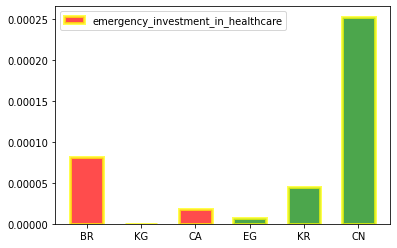

In [41]:
x = ["BR","KG","CA","EG","KR","CN"]
y = [BR_emergency_investment_in_healthcare_average ,KG_emergency_investment_in_healthcare_average ,CA_emergency_investment_in_healthcare_average ,
     EG_emergency_investment_in_healthcare_average ,KR_emergency_investment_in_healthcare_average ,CN_emergency_investment_in_healthcare_average]
plt.bar(x, y, alpha=0.7, width=0.6, color='rrrggg', edgecolor='yellow', label='emergency_investment_in_healthcare', lw=3)
plt.legend(loc='upper left')
plt.show()

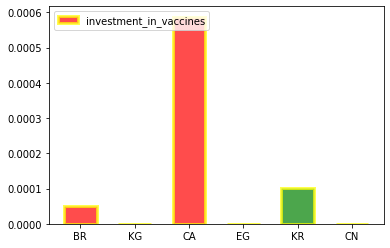

In [42]:
x = ["BR","KG","CA","EG","KR","CN"]
y = [BR_investment_in_vaccines_average ,KG_investment_in_vaccines_average ,CA_investment_in_vaccines_average ,
     EG_investment_in_vaccines_average ,KR_investment_in_vaccines_average ,CN_investment_in_vaccines_average]
plt.bar(x, y, alpha=0.7, width=0.6, color='rrrggg', edgecolor='yellow', label='investment_in_vaccines', lw=3)
plt.legend(loc='upper left')
plt.show()